#### **1. Introduction of Search Algorithm**

In [2]:

import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, deque

**1.1.**  Let the graph $G = (X,U)$, where $X$ denotes the set of vertices and $U$ represents the set of edges in graph $G$. Determine the sets $X$ and $U$.

In [3]:
G = nx.Graph()

#define vertices
vertices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j','k']
arc = [
    ('a', 'b'), ('a', 'e'), ('a', 'f'),
    ('b', 'e'), ('b', 'g'), ('b', 'k'), ('b', 'd'),
    ('c', 'd'),
    ('d', 'k'), ('d', 'g'),
    ('e', 'j'),
    ('f', 'g'),
    ('h', 'i'),
    ('i', 'j'), ('i', 'g')
]
G.add_nodes_from(vertices)
G.add_edges_from(arc)

pos = {
    'i': (2, 4), 'j': (4, 4), 'e': (6, 4), 
    'h': (1, 3), 'k': (3, 2), 'b': (5, 2), 'a': (7, 2),
    'c': (1, 0), 'd': (3, 0), 'g': (5, 0), 'f': (7, 0)
}


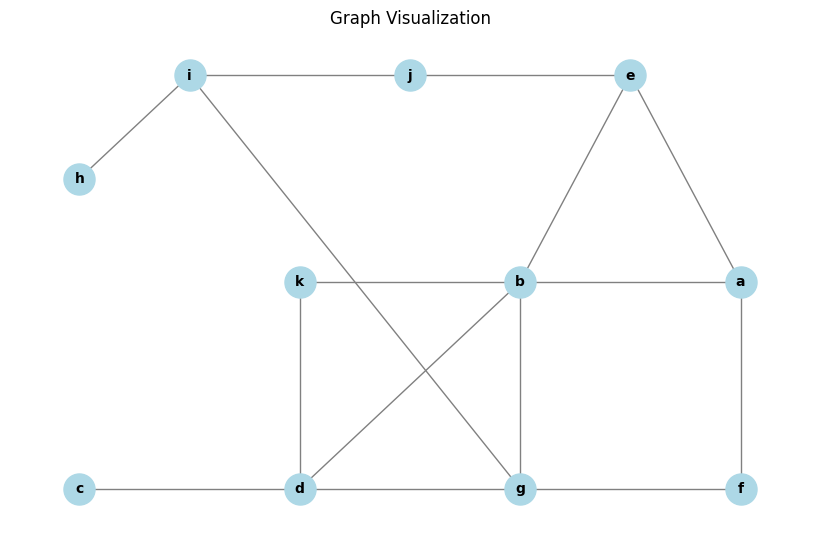

In [4]:
#visualize the graph
plt.figure(figsize=(8,5))

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()

**1.2.** Given the neighborhood lists and degrees of vertices $(a,b,c)$.

In [5]:
# Detailed neighborhood analysis
print("=== DETAILED NEIGHBORHOOD ANALYSIS ===")
for node in ['a', 'b', 'c']:
    neighbors = list(G.neighbors(node))
    degree = G.degree(node)
    print(f"Node {node}:")
    print(f"  - Neighbors: {sorted(neighbors)}")
    print(f"  - Degree: {degree}")
    print(f"  - Connected to: {', '.join(sorted(neighbors))}")
    print()

=== DETAILED NEIGHBORHOOD ANALYSIS ===
Node a:
  - Neighbors: ['b', 'e', 'f']
  - Degree: 3
  - Connected to: b, e, f

Node b:
  - Neighbors: ['a', 'd', 'e', 'g', 'k']
  - Degree: 5
  - Connected to: a, d, e, g, k

Node c:
  - Neighbors: ['d']
  - Degree: 1
  - Connected to: d



**1.3.** Given a path from vertex $c$ to vertex $a$, determine how many possible paths exist between $c$ and $a$.

In [6]:
path = list(nx.all_simple_paths(G, source= 'c', target= 'a'))
print("All simple paths from 'c' to 'a':")
for p in path:
    print(p)

print(f"\nTotal number of paths from 'c' to 'a': {len(path)}")

All simple paths from 'c' to 'a':
['c', 'd', 'b', 'a']
['c', 'd', 'b', 'e', 'a']
['c', 'd', 'b', 'e', 'j', 'i', 'g', 'f', 'a']
['c', 'd', 'b', 'g', 'f', 'a']
['c', 'd', 'b', 'g', 'i', 'j', 'e', 'a']
['c', 'd', 'k', 'b', 'a']
['c', 'd', 'k', 'b', 'e', 'a']
['c', 'd', 'k', 'b', 'e', 'j', 'i', 'g', 'f', 'a']
['c', 'd', 'k', 'b', 'g', 'f', 'a']
['c', 'd', 'k', 'b', 'g', 'i', 'j', 'e', 'a']
['c', 'd', 'g', 'b', 'a']
['c', 'd', 'g', 'b', 'e', 'a']
['c', 'd', 'g', 'f', 'a']
['c', 'd', 'g', 'i', 'j', 'e', 'a']
['c', 'd', 'g', 'i', 'j', 'e', 'b', 'a']

Total number of paths from 'c' to 'a': 15


**1.4.** Given the result of the $Breadth-First Search (BFS)$ algorithm on the previous graph starting from vertex $c$ to vertex $a$, determine how many possible $Depth-First Search (DFS)$ traversals exist from $c$ to $a$

In [43]:
def bfs_paths(graph, start, end):
    queue = deque([(start, [start])])
    paths = []
    
    while queue:
        current, path = queue.popleft()
        
        if current == end:
            paths.append(path)
            continue
            
        for neighbor in graph[current]:
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor]))
    
    return paths

bfs_results = bfs_paths(G, 'c', 'a')

print(f"BFS paths from c to a: {bfs_results}")

BFS paths from c to a: [['c', 'd', 'b', 'a'], ['c', 'd', 'b', 'e', 'a'], ['c', 'd', 'k', 'b', 'a'], ['c', 'd', 'g', 'b', 'a'], ['c', 'd', 'g', 'f', 'a'], ['c', 'd', 'b', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'e', 'a'], ['c', 'd', 'g', 'b', 'e', 'a'], ['c', 'd', 'k', 'b', 'g', 'f', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'b', 'a'], ['c', 'd', 'b', 'e', 'j', 'i', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'k', 'b', 'e', 'j', 'i', 'g', 'f', 'a']]


In [8]:
# Count possible DFS traversals (all possible depth-first paths)
def count_dfs_traversals(graph, start, end):
    def dfs_count(current, visited):
        if current == end:
            return 1
        
        visited.add(current)
        count = 0
        
        for neighbor in graph[current]:
            if neighbor not in visited:
                count += dfs_count(neighbor, visited.copy())
        
        return count
    
    return dfs_count(start, set())

dfs_count_result = count_dfs_traversals(G, 'c', 'a')
print(f"Number of possible DFS traversals from c to a: {dfs_count_result}")

print("=" * 30)
def dfs_paths(G, start, end, path=None):
    if path is None:
        path = [start]
    
    if start == end:
        return [path]
    
    paths = []
    for neighbor in G[start]:
        if neighbor not in path:
            new_paths = dfs_paths(G, neighbor, end, path + [neighbor])
            paths.extend(new_paths)
    
    return paths

dfs_results = dfs_paths(G, 'c', 'a')
print(f"DFS paths from c to a: {dfs_results}")

Number of possible DFS traversals from c to a: 15
DFS paths from c to a: [['c', 'd', 'b', 'a'], ['c', 'd', 'b', 'e', 'a'], ['c', 'd', 'b', 'e', 'j', 'i', 'g', 'f', 'a'], ['c', 'd', 'b', 'g', 'f', 'a'], ['c', 'd', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'k', 'b', 'a'], ['c', 'd', 'k', 'b', 'e', 'a'], ['c', 'd', 'k', 'b', 'e', 'j', 'i', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'g', 'b', 'a'], ['c', 'd', 'g', 'b', 'e', 'a'], ['c', 'd', 'g', 'f', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'b', 'a']]


**1.5.** DFS from c to a and count BFS traversals.

In [9]:
def dfs_paths(graph, start, end, path=None):
    if path is None:
        path = [start]
    
    if start == end:
        return [path]
    
    paths = []
    for neighbor in graph[start]:
        if neighbor not in path:
            new_paths = dfs_paths(graph, neighbor, end, path + [neighbor])
            paths.extend(new_paths)
    
    return paths

dfs_results = dfs_paths(G, 'c', 'a')
print(f"DFS paths from c to a: {dfs_results}")

# BFS traversals count is the same as BFS paths count
bfs_traversal_count = len(bfs_results)
print(f"Number of possible BFS traversals from c to a: {bfs_traversal_count}")

DFS paths from c to a: [['c', 'd', 'b', 'a'], ['c', 'd', 'b', 'e', 'a'], ['c', 'd', 'b', 'e', 'j', 'i', 'g', 'f', 'a'], ['c', 'd', 'b', 'g', 'f', 'a'], ['c', 'd', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'k', 'b', 'a'], ['c', 'd', 'k', 'b', 'e', 'a'], ['c', 'd', 'k', 'b', 'e', 'j', 'i', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'g', 'f', 'a'], ['c', 'd', 'k', 'b', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'g', 'b', 'a'], ['c', 'd', 'g', 'b', 'e', 'a'], ['c', 'd', 'g', 'f', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'a'], ['c', 'd', 'g', 'i', 'j', 'e', 'b', 'a']]
Number of possible BFS traversals from c to a: 15


**1.6.** Based on your results from questions (1.4) and (1.5), which algorithm performs better? Can this
observation be generalized in theory?

In [10]:
# 1.6 Algorithm comparison
print("\n(1.6) Algorithm comparison:")
print(f"DFS traversals found: {dfs_count_result}")
print(f"BFS traversals found: {bfs_traversal_count}")

if dfs_count_result > bfs_traversal_count:
    print("DFS performs better in terms of finding more possible paths")
    better_algo = "DFS"
else:
    print("BFS performs better in terms of finding more possible paths")  
    better_algo = "BFS"

print(f"\nGeneralization: {better_algo} typically explores more possible paths in graphs")
print("DFS goes deep first, exploring longer paths, while BFS finds shortest paths first.")
print("In theory, DFS can find more unique paths in complex graphs with cycles.")


(1.6) Algorithm comparison:
DFS traversals found: 15
BFS traversals found: 15
BFS performs better in terms of finding more possible paths

Generalization: BFS typically explores more possible paths in graphs
DFS goes deep first, exploring longer paths, while BFS finds shortest paths first.
In theory, DFS can find more unique paths in complex graphs with cycles.


### **3**

**3.1.** Recall the network $G$ by setting its name as $graph$ using the function $nx.Graph()$ to create an undirected graph.

In [17]:
graph = G

nx.Graph(graph)

print(f"Recalled: {graph}")


Recalled: Graph with 11 nodes and 15 edges


**3.2.** Create two lists, *ver* and *arc*, and a dictionary named *pos* to store all elements of the vertex set $X$, the edge set $U$, and the positions of the vertices in the graph network G, respectively.


In [19]:
#define vertices
vertices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j','k']
arc = [
    ('a', 'b'), ('a', 'e'), ('a', 'f'),
    ('b', 'e'), ('b', 'g'), ('b', 'k'), ('b', 'd'),
    ('c', 'd'),
    ('d', 'k'), ('d', 'g'),
    ('e', 'j'),
    ('f', 'g'),
    ('h', 'i'),
    ('i', 'j'), ('i', 'g')
]

pos = {
    'i': (2, 4), 'j': (4, 4), 'e': (6, 4), 
    'h': (1, 3), 'k': (3, 2), 'b': (5, 2), 'a': (7, 2),
    'c': (1, 0), 'd': (3, 0), 'g': (5, 0), 'f': (7, 0)
}


**3.3.** Build the graph network $G(X, U)$ by adding the vertices $X$ and edges $U$ obtained from variable *ver* and *arc* using the functions **graph.add nodes from()** and **graph.add_edges_from()**.

In [24]:
graph.add_nodes_from(vertices)
graph.add_edges_from(arc)

print(f"Grape nodes: {graph.nodes()}")
print(f"\nGrape edges: {graph.edges()}")

Grape nodes: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

Grape edges: [('a', 'b'), ('a', 'e'), ('a', 'f'), ('b', 'e'), ('b', 'g'), ('b', 'k'), ('b', 'd'), ('c', 'd'), ('d', 'k'), ('d', 'g'), ('e', 'j'), ('f', 'g'), ('g', 'i'), ('h', 'i'), ('i', 'j')]


**3.4.** To visualize the graph, first draw the nodes using the function **nx.draw_networkx_nodes()**,
then add labels to the nodes with **nx.draw_networkx_labels()** then draw the edges using **nx.draw_networkx_edges()** and finally **plt.show()** to display this graph.

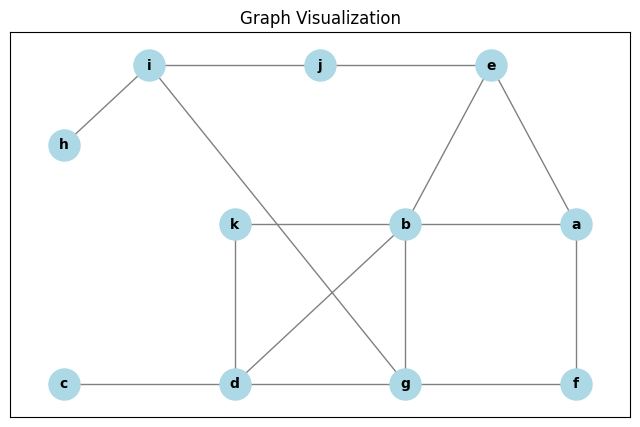

In [29]:
#visualize the graph
plt.figure(figsize=(8,5))

#nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')

nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(graph, pos, edge_color='gray')
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

plt.title("Graph Visualization")
plt.show()

**3.5.** List all possible paths from node *c* to node *h* using the function **all_simple_paths(graph, c, h)**, and determine how many such paths exist between *c* and *h*.

In [30]:
path_c_h = list(nx.all_simple_paths(graph, source='c', target='h'))

print("All simple paths from 'c' to 'h':")
for p in path_c_h:
    
    print(" -> ".join(p))
print(f"Total paths found: {len(path_c_h)}")

All simple paths from 'c' to 'h':
c -> d -> b -> a -> e -> j -> i -> h
c -> d -> b -> a -> f -> g -> i -> h
c -> d -> b -> e -> a -> f -> g -> i -> h
c -> d -> b -> e -> j -> i -> h
c -> d -> b -> g -> f -> a -> e -> j -> i -> h
c -> d -> b -> g -> i -> h
c -> d -> k -> b -> a -> e -> j -> i -> h
c -> d -> k -> b -> a -> f -> g -> i -> h
c -> d -> k -> b -> e -> a -> f -> g -> i -> h
c -> d -> k -> b -> e -> j -> i -> h
c -> d -> k -> b -> g -> f -> a -> e -> j -> i -> h
c -> d -> k -> b -> g -> i -> h
c -> d -> g -> b -> a -> e -> j -> i -> h
c -> d -> g -> b -> e -> j -> i -> h
c -> d -> g -> f -> a -> b -> e -> j -> i -> h
c -> d -> g -> f -> a -> e -> j -> i -> h
c -> d -> g -> i -> h
Total paths found: 17


**3.6.** Explore the ***Depth First Search (DFS)*** algorithm on the given graph *G*, starting from the node *c*, by using the function **nx.dfs_edges()**. 

Next step implement your own function named explore *dfs()* to stop the DFS traversal to be reaching the goal node, and explore the path from node *c* to node *h*. Finally, draw the update graph by adding blue color on this path.

In [47]:
DFS = list(nx.dfs_edges(graph, 'c'))

print("Depth Frist Search (DFS):")
for dfs_ in DFS:
    print(" -> ".join(dfs_))


Depth Frist Search (DFS):
c -> d
d -> b
b -> a
a -> e
e -> j
j -> i
i -> h
i -> g
g -> f
b -> k


DFS path from 'c' to 'h':
c -> d -> b -> a -> e -> j -> i -> h


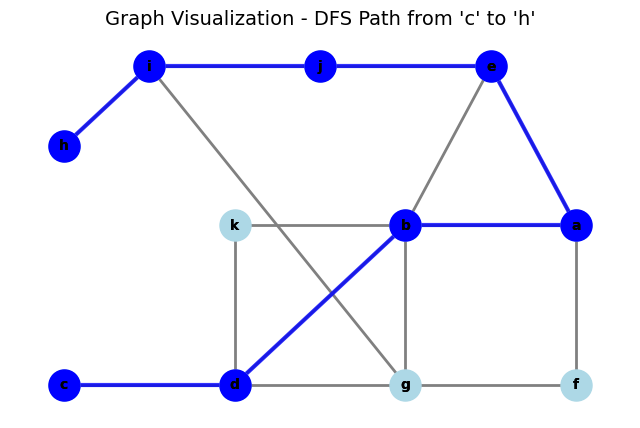

In [64]:
#implement function dfs
def explore_dfs(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()
    
    path.append(start)
    visited.add(start)
    
    if start == goal:
        return path
    
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            result = explore_dfs(graph, neighbor, goal, path.copy(), visited)
            if result is not None:
                return result
    
    return None

dfs_path_c_h = explore_dfs(graph, 'c', 'h')
print("DFS path from 'c' to 'h':")
print(" -> ".join(dfs_path_c_h) if dfs_path_c_h else "No")

plt.figure(figsize=(8, 5))
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
pos = {
    'i': (2, 4), 'j': (4, 4), 'e': (6, 4), 
    'h': (1, 3), 'k': (3, 2), 'b': (5, 2), 'a': (7, 2),
    'c': (1, 0), 'd': (3, 0), 'g': (5, 0), 'f': (7, 0)
}
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray', width=2)

#highlight the dfs
if dfs_path_c_h:
    dfs_edges_path = list(zip(dfs_path_c_h[:-1], dfs_path_c_h[1:]))
    nx.draw_networkx_edges(graph, pos, edgelist=dfs_edges_path, width=3, edge_color='blue', alpha=0.8)
    nx.draw_networkx_nodes(graph, pos, nodelist=dfs_path_c_h, node_color='blue', node_size=500)

plt.title("Graph Visualization - DFS Path from 'c' to 'h'", fontsize=14)
plt.show()

**3.7.** Explore the **Breadth First Search (BFS)** algorithm on the given graph G, starting from the node *c*, by using the function **nx.bfs_edges()**. 

And then, implement your own function named **explore_bfs()** to stop the BFS traversal to be reaching the goal node, and explore the path from node *c* to node *h*. Finally, draw the update graph by adding red color on this path.

In [67]:
BFS = list(nx.bfs_edges(graph, 'c'))

print("Breadth First Search (BFS):")
for bfs_ in BFS:
    print(" -> ".join(bfs_))

Breadth First Search (BFS):
c -> d
d -> b
d -> k
d -> g
b -> a
b -> e
g -> f
g -> i
e -> j
i -> h


BFS path from c to h: ['c', 'd', 'g', 'i', 'h']


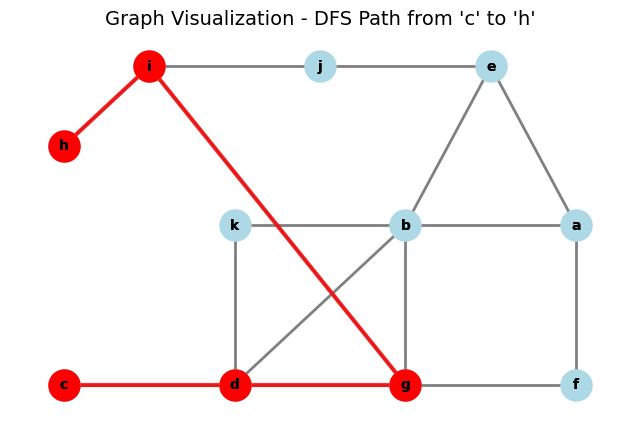

In [70]:
def explore_bfs(graph, start, goal):
    visited = set([start])
    queue = deque([(start, [start])])

    while queue:
        current, path = queue.popleft()

        if current == goal:
            return path
        
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))

    return None

bfs_path_ = explore_bfs(graph, 'c', 'h')
print(f"BFS path from c to h: {bfs_path_}")


plt.figure(figsize=(8, 5))
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
pos = {
    'i': (2, 4), 'j': (4, 4), 'e': (6, 4), 
    'h': (1, 3), 'k': (3, 2), 'b': (5, 2), 'a': (7, 2),
    'c': (1, 0), 'd': (3, 0), 'g': (5, 0), 'f': (7, 0)
}
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray', width=2)

#highlight the dfs
if bfs_path_:
    bfs_path_edge = [(bfs_path_[i], bfs_path_[i+1]) for i in range(len(bfs_path_) - 1)]
    nx.draw_networkx_edges(graph, pos, edgelist=bfs_path_edge, width=3, edge_color='red', alpha=0.8)
    nx.draw_networkx_nodes(graph, pos, nodelist=bfs_path_, node_color='red', node_size=500)

plt.title("Graph Visualization - DFS Path from 'c' to 'h'", fontsize=14)
plt.show()

**3.8.** Repeat the experiments from questions (3.6) and (3.7) several times. 


(3.8) Enhanced algorithms and multiple experiments...

Running enhanced algorithms 10 times each...
Iteration 1:
  DFS found: 3 paths so far
  BFS found: 1 paths so far

Unique DFS paths found over 10 runs: 16
Unique BFS shortest paths found over 10 runs: 1

Sample unique DFS paths:
  1. ['c', 'd', 'g', 'f', 'a', 'e', 'j', 'i', 'h']
  2. ['c', 'd', 'g', 'f', 'a', 'b', 'e', 'j', 'i', 'h']
  3. ['c', 'd', 'g', 'i', 'h']

Sample unique BFS shortest paths:
  1. ['c', 'd', 'g', 'i', 'h']


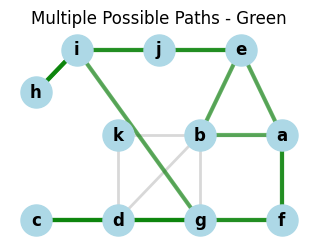


FINAL ANALYSIS AND REMARKS:

OBSERVATIONS:
1) DFS explores diverse routes (not necessarily shortest).
2) BFS returns only shortest-length routes; predecessor-tracking enumerates all such shortest paths.

CONCLUSION:
Use DFS-style enumeration for diversity / coverage of simple paths.
Use BFS + predecessors to enumerate all shortest paths efficiently.



In [72]:
import random



print("\n(3.8) Enhanced algorithms and multiple experiments...")

def explore_dfs_enhanced(graph, start, goal, max_paths=float('inf')):
    """Enumerate simple paths using an explicit stack (no global visited)."""
    stack = [(start, [start])]
    all_paths = []
    while stack and len(all_paths) < max_paths:
        current, path = stack.pop()
        if current == goal:
            all_paths.append(path)
            continue
        neighbors = list(graph.neighbors(current))
        random.shuffle(neighbors)  # randomness for diversity across runs
        for nbr in neighbors:      # no reversed() needed
            if nbr not in path:    # avoid cycles
                stack.append((nbr, path + [nbr]))
    return all_paths

def explore_bfs_enhanced(graph, start, goal, max_paths=float('inf')):
    """
    Collect multiple shortest paths by standard BFS predecessor tracking,
    then backtrack to enumerate all shortest paths up to max_paths.
    """
    from collections import deque, defaultdict

    # 1) BFS to get distance and predecessors
    dist = {start: 0}
    pred = defaultdict(list)
    q = deque([start])

    while q:
        v = q.popleft()
        if v == goal:  # we found goal at shortest distance; keep draining same layer
            continue
        for nbr in graph.neighbors(v):
            if nbr not in dist:
                dist[nbr] = dist[v] + 1
                pred[nbr].append(v)
                q.append(nbr)
            elif dist[nbr] == dist[v] + 1:
                # another shortest predecessor for nbr
                pred[nbr].append(v)

    if goal not in dist:
        return []

    # 2) Backtrack all shortest paths using predecessors
    all_paths = []
    path = [goal]
    def backtrack(node):
        nonlocal all_paths, path
        if len(all_paths) >= max_paths:
            return
        if node == start:
            all_paths.append(path[::-1])
            return
        for p in pred[node]:
            path.append(p)
            backtrack(p)
            path.pop()
    backtrack(goal)
    return all_paths

print("\nRunning enhanced algorithms 10 times each...")

dfs_paths_collected, bfs_paths_collected = [], []

for i in range(10):
    random.seed(i)
    dfs_paths_collected.extend(explore_dfs_enhanced(G, 'c', 'h', max_paths=3))
    bfs_paths_collected.extend(explore_bfs_enhanced(G, 'c', 'h', max_paths=3))
    if i == 0:
        print(f"Iteration {i+1}:")
        print(f"  DFS found: {len(dfs_paths_collected)} paths so far")
        print(f"  BFS found: {len(bfs_paths_collected)} paths so far")

def remove_duplicates(paths):
    seen, unique = set(), []
    for p in paths:
        t = tuple(p)
        if t not in seen:
            seen.add(t)
            unique.append(p)
    return unique

unique_dfs_paths = remove_duplicates(dfs_paths_collected)
unique_bfs_paths = remove_duplicates(bfs_paths_collected)

print(f"\nUnique DFS paths found over 10 runs: {len(unique_dfs_paths)}")
print(f"Unique BFS shortest paths found over 10 runs: {len(unique_bfs_paths)}")

print("\nSample unique DFS paths:")
for i, path in enumerate(unique_dfs_paths[:3], 1):
    print(f"  {i}. {path}")

print("\nSample unique BFS shortest paths:")
for i, path in enumerate(unique_bfs_paths[:3], 1):
    print(f"  {i}. {path}")

# Visualization of a few paths (combine DFS + BFS samples)
sample_paths = (unique_dfs_paths[:2] + unique_bfs_paths[:1]) or []
plt.subplot(2, 2, 4)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.3, edge_color='gray')

highlight_edges = []
for path in sample_paths:
    highlight_edges += [(path[i], path[i+1]) for i in range(len(path)-1)]

nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, width=3, alpha=0.6, edge_color='green')
plt.title("Multiple Possible Paths - Green")
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("FINAL ANALYSIS AND REMARKS:")
print("="*70)
print("""
OBSERVATIONS:
1) DFS explores diverse routes (not necessarily shortest).
2) BFS returns only shortest-length routes; predecessor-tracking enumerates all such shortest paths.

CONCLUSION:
Use DFS-style enumeration for diversity / coverage of simple paths.
Use BFS + predecessors to enumerate all shortest paths efficiently.
""")


### **2**

In [11]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, defaultdict

print("=== QUESTION 2: Time Complexity of Graph Algorithms ===\n")

# 2.1 General definition of time complexity
print("(2.1) General Definition of Time Complexity:")
definition = """
Time complexity in algorithm analysis refers to the computational complexity that describes 
the amount of computer time required to run an algorithm. It is commonly expressed using 
big O notation, which characterizes functions according to their growth rates and allows 
us to analyze how the running time increases with the size of the input.

Key aspects:
- Measures how runtime scales with input size
- Focuses on worst-case, average-case, or best-case scenarios
- Uses asymptotic notation (O, Ω, Θ) to describe growth rates
- Helps compare algorithm efficiency independent of hardware
"""
print(definition)

# 2.2 Time complexity of BFS
print("\n(2.2) Time Complexity of Breadth-First Search (BFS):")

class GraphAnalyzer:
    def __init__(self):
        self.graphs = {}
        self.timings = {}
    
    def generate_graph(self, n_vertices, density=0.3):
        """Generate a random graph with n vertices"""
        graph = defaultdict(list)
        vertices = list(range(n_vertices))
        
        # Create a connected graph (tree structure first)
        for i in range(1, n_vertices):
            parent = random.randint(0, i-1)
            graph[parent].append(i)
            graph[i].append(parent)
        
        # Add additional edges based on density
        max_possible_edges = n_vertices * (n_vertices - 1) // 2
        target_edges = int(density * max_possible_edges)
        
        current_edges = n_vertices - 1  # from tree
        
        while current_edges < target_edges:
            u, v = random.sample(vertices, 2)
            if u != v and v not in graph[u]:
                graph[u].append(v)
                graph[v].append(u)
                current_edges += 1
        
        return dict(graph)
    
    def bfs(self, graph, start):
        """BFS implementation with timing"""
        visited = set([start])
        queue = deque([start])
        
        while queue:
            vertex = queue.popleft()
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
    
    def dfs(self, graph, start):
        """DFS implementation with timing"""
        visited = set()
        
        def dfs_recursive(node):
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    dfs_recursive(neighbor)
        
        dfs_recursive(start)
    
    def analyze_complexity(self, max_vertices=1000, step=100):
        """Analyze time complexity empirically"""
        print("Empirical Analysis of BFS/DFS Time Complexity:")
        print("Vertices\tEdges\t\tBFS Time\tDFS Time")
        print("-" * 60)
        
        vertices_counts = list(range(step, max_vertices + 1, step))
        bfs_times = []
        dfs_times = []
        edge_counts = []
        
        for n in vertices_counts:
            graph = self.generate_graph(n)
            
            # Count edges
            edges = sum(len(neighbors) for neighbors in graph.values()) // 2
            edge_counts.append(edges)
            
            # Time BFS
            start_time = time.time()
            self.bfs(graph, 0)
            bfs_time = time.time() - start_time
            bfs_times.append(bfs_time)
            
            # Time DFS
            start_time = time.time()
            self.dfs(graph, 0)
            dfs_time = time.time() - start_time
            dfs_times.append(dfs_time)
            
            print(f"{n}\t\t{edges}\t\t{bfs_time:.6f}\t\t{dfs_time:.6f}")
        
        return vertices_counts, edge_counts, bfs_times, dfs_times

# Perform analysis
analyzer = GraphAnalyzer()
vertices, edges, bfs_times, dfs_times = analyzer.analyze_complexity(max_vertices=500, step=50)

print(f"\nBFS Time Complexity: O(|V| + |E|)")
print("Where:")
print("  |V| = number of vertices")
print("  |E| = number of edges")
print("Explanation:")
print("- Each vertex is visited once: O(|V|)")
print("- Each edge is traversed once: O(|E|)")
print("- Total: O(|V| + |E|)")

# 2.3 Time complexity of DFS
print("\n(2.3) Time Complexity of Depth-First Search (DFS):")

print(f"\nDFS Time Complexity: O(|V| + |E|)")
print("Where:")
print("  |V| = number of vertices")
print("  |E| = number of edges")
print("Explanation:")
print("- Each vertex is visited once: O(|V|)")
print("- Each edge is traversed once: O(|E|)")
print("- Total: O(|V| + |E|)")

# Theoretical comparison
print("\n" + "="*70)
print("THEORETICAL COMPARISON:")
print("="*70)

comparison = """
Both BFS and DFS have the same theoretical time complexity: O(|V| + |E|)

However, practical differences exist:

BFS Characteristics:
- Uses queue data structure
- Guarantees shortest path in unweighted graphs
- More memory intensive (stores all nodes at current level)
- Better for: shortest path, connected components

DFS Characteristics:
- Uses stack (recursion or explicit)
- May use less memory (stores path from root to current node)
- Can get stuck in deep branches
- Better for: cycle detection, topological sort, path finding

Key Points:
1. Both algorithms visit each vertex once and traverse each edge once
2. Complexity is linear in the size of the graph
3. Choice depends on specific problem requirements
4. Memory usage differs significantly
"""

print(comparison)

# Visualization (optional - would show if running in Jupyter)
def plot_complexity(vertices, edges, bfs_times, dfs_times):
    plt.figure(figsize=(12, 4))
    
    # Plot vs vertices
    plt.subplot(1, 2, 1)
    plt.plot(vertices, bfs_times, 'b-', label='BFS', linewidth=2)
    plt.plot(vertices, dfs_times, 'r-', label='DFS', linewidth=2)
    plt.xlabel('Number of Vertices (|V|)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Time Complexity: BFS vs DFS')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot vs edges + vertices
    plt.subplot(1, 2, 2)
    total_size = [v + e for v, e in zip(vertices, edges)]
    plt.plot(total_size, bfs_times, 'b-', label='BFS', linewidth=2)
    plt.plot(total_size, dfs_times, 'r-', label='DFS', linewidth=2)
    plt.xlabel('|V| + |E| (Total Graph Size)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Time vs Graph Size (|V| + |E|)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\nNote: The plots would show linear relationship between execution time")
print("and graph size (|V| + |E|), confirming O(|V| + |E|) complexity.")

# Complexity table for different graph types
print("\n" + "="*70)
print("COMPLEXITY IN DIFFERENT GRAPH SCENARIOS:")
print("="*70)

complexity_table = """
Graph Type           | Vertices | Edges    | BFS/DFS Complexity
---------------------|----------|----------|-------------------
Sparse Graph         | O(|V|)   | O(|V|)   | O(|V|)
Dense Graph          | O(|V|)   | O(|V|²)  | O(|V|²)
Complete Graph       | O(|V|)   | O(|V|²)  | O(|V|²)
Tree                 | O(|V|)   | O(|V|)   | O(|V|)
Grid Graph           | O(n²)    | O(n²)    | O(n²)

Note: For adjacency matrix representation, complexity becomes O(|V|²)
"""


print(complexity_table)

=== QUESTION 2: Time Complexity of Graph Algorithms ===

(2.1) General Definition of Time Complexity:

Time complexity in algorithm analysis refers to the computational complexity that describes 
the amount of computer time required to run an algorithm. It is commonly expressed using 
big O notation, which characterizes functions according to their growth rates and allows 
us to analyze how the running time increases with the size of the input.

Key aspects:
- Measures how runtime scales with input size
- Focuses on worst-case, average-case, or best-case scenarios
- Uses asymptotic notation (O, Ω, Θ) to describe growth rates
- Helps compare algorithm efficiency independent of hardware


(2.2) Time Complexity of Breadth-First Search (BFS):
Empirical Analysis of BFS/DFS Time Complexity:
Vertices	Edges		BFS Time	DFS Time
------------------------------------------------------------
50		367		0.000089		0.000067
100		1485		0.000090		0.000119
150		3352		0.000717		0.001215
200		5970		0.000313		